## Markov Chain Analysis of Social Mobility in Ticul, Mexico

In [1]:
import numpy as np
import pandas as pd

# Step 1: Define the initial distribution (based on 123 persons)
initial_counts = np.array([47, 24, 14, 20, 12, 6])
initial_distribution = initial_counts / initial_counts.sum()

# Step 2: Define the transition matrix P
P = np.array([
    [0.62, 0.11, 0.05, 0.15, 0.05, 0.00],
    [0.47, 0.32, 0.21, 0.00, 0.00, 0.00],
    [0.18, 0.45, 0.09, 0.09, 0.00, 0.18],
    [0.00, 0.00, 0.00, 0.50, 0.50, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.33, 0.67],
    [0.00, 0.00, 0.00, 0.00, 0.00, 1.00]
])

# State labels
states = [
    "Poor Mestizos (1)", "Ordinary Mestizos (2)", "Fine Mestizos (3)",
    "Poor Catrines (4)", "Ordinary Catrines (5)", "Wealthy Catrines (6)"
]

# Step 3: Create a DataFrame for the transition matrix
df_transition_matrix = pd.DataFrame(P, index=states, columns=states)
print("Transition Matrix:\n")
print(df_transition_matrix)

# Step 4: Compute the distribution after two generations
distribution_after_two_generations = initial_distribution @ P @ P
approx_counts = np.round(distribution_after_two_generations * 123).astype(int)

# Step 5: Create and display results
df_result = pd.DataFrame({
    "State": states,
    "Proportion": np.round(distribution_after_two_generations, 4),
    "Approx. Count": approx_counts
})

print("\nDistribution After Two Generations:\n")
print(df_result)

Transition Matrix:

                       Poor Mestizos (1)  Ordinary Mestizos (2)  \
Poor Mestizos (1)                   0.62                   0.11   
Ordinary Mestizos (2)               0.47                   0.32   
Fine Mestizos (3)                   0.18                   0.45   
Poor Catrines (4)                   0.00                   0.00   
Ordinary Catrines (5)               0.00                   0.00   
Wealthy Catrines (6)                0.00                   0.00   

                       Fine Mestizos (3)  Poor Catrines (4)  \
Poor Mestizos (1)                   0.05               0.15   
Ordinary Mestizos (2)               0.21               0.00   
Fine Mestizos (3)                   0.09               0.09   
Poor Catrines (4)                   0.00               0.50   
Ordinary Catrines (5)               0.00               0.00   
Wealthy Catrines (6)                0.00               0.00   

                       Ordinary Catrines (5)  Wealthy Catrines (6)  

## Graph Visualization

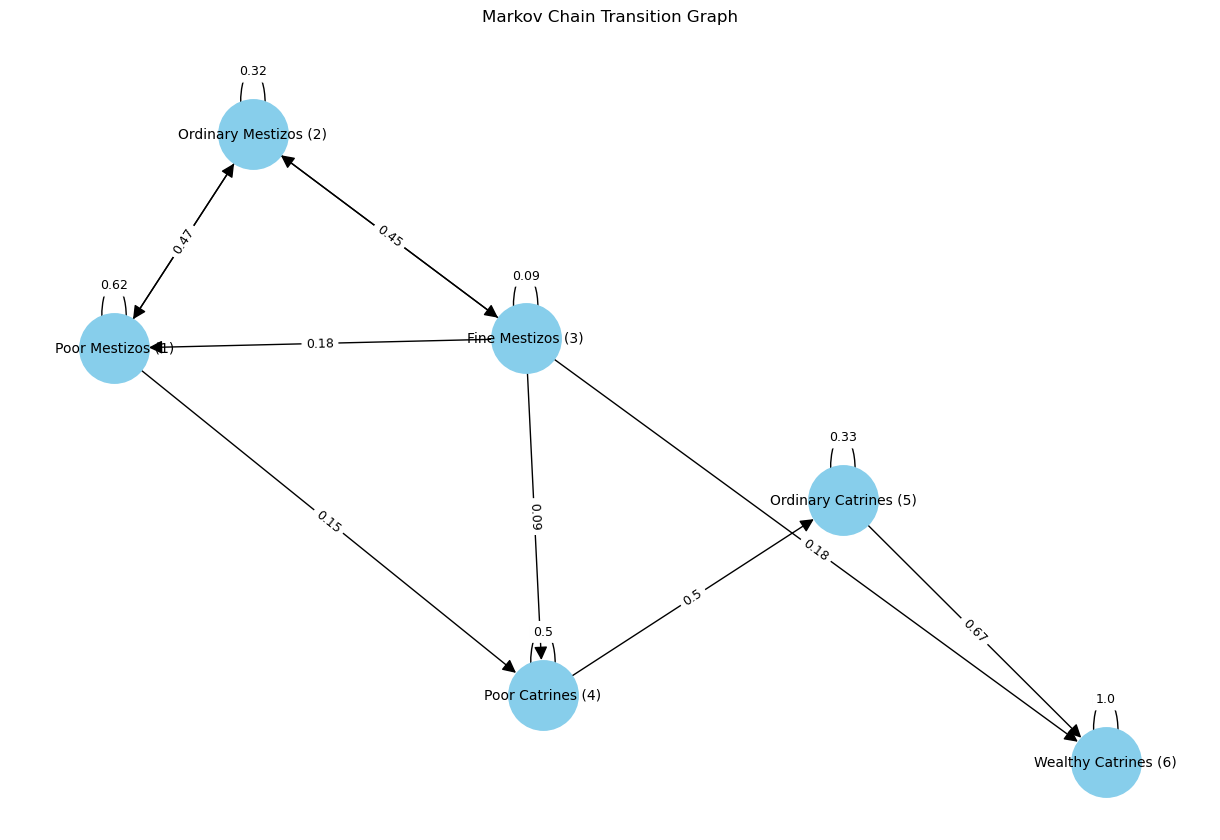

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (only show significant transitions > 0.05 to reduce clutter)
for i in range(len(states)):
    for j in range(len(states)):
        weight = P[i][j]
        if weight > 0.05:
            G.add_edge(states[i], states[j], weight=round(weight, 2))

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # For consistent layout
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, font_size=10, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.title("Markov Chain Transition Graph")
plt.show()